<h2 style="color:red" align="center">Red-Wine Quality Prediction : By using Linear Regression </h2>

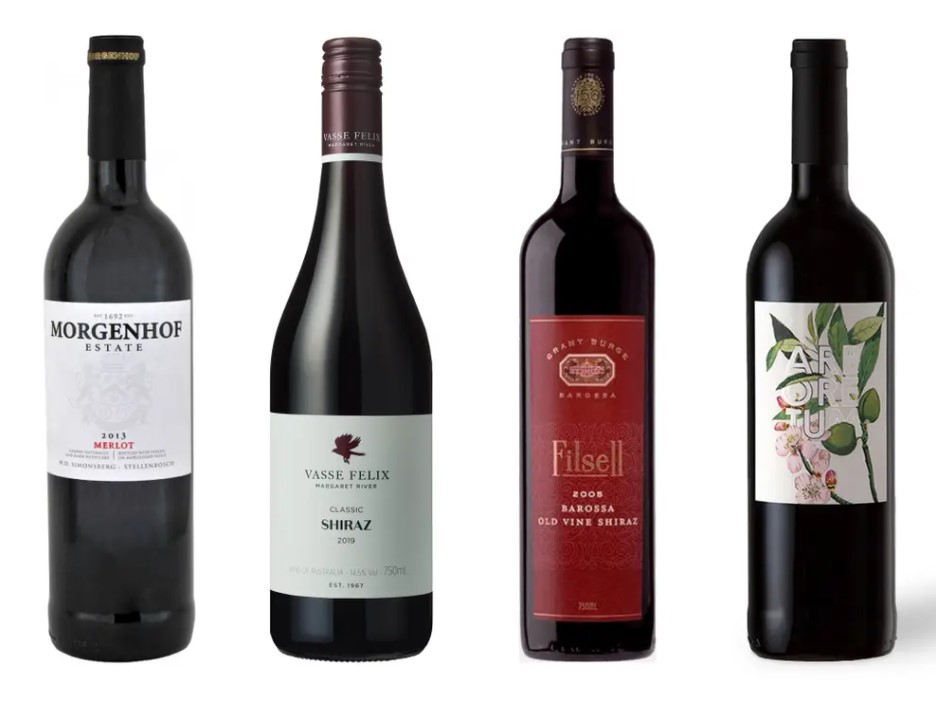

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('Winequality.csv')
df.describe()

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


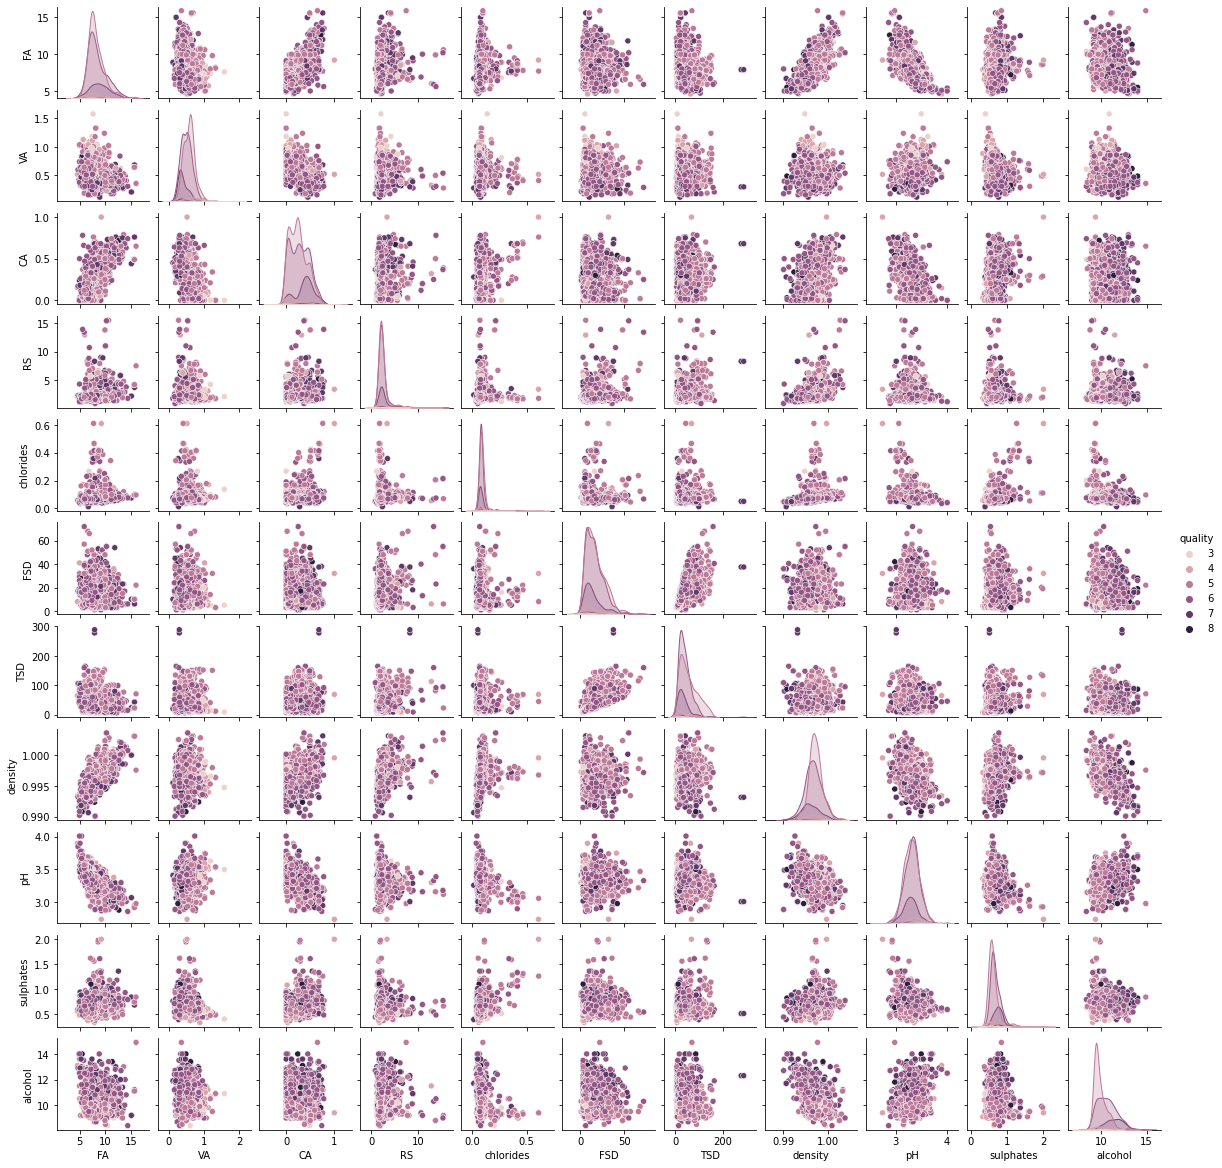

In [3]:
sns.pairplot(df, hue='quality', height = 1.5);

###  <span style='color:Purple'> Now Let's take some insites about data </span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FA         1599 non-null   float64
 1   VA         1599 non-null   float64
 2   CA         1599 non-null   float64
 3   RS         1599 non-null   float64
 4   chlorides  1599 non-null   float64
 5   FSD        1599 non-null   float64
 6   TSD        1599 non-null   float64
 7   density    1599 non-null   float64
 8   pH         1599 non-null   float64
 9   sulphates  1599 non-null   float64
 10  alcohol    1599 non-null   float64
 11  quality    1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


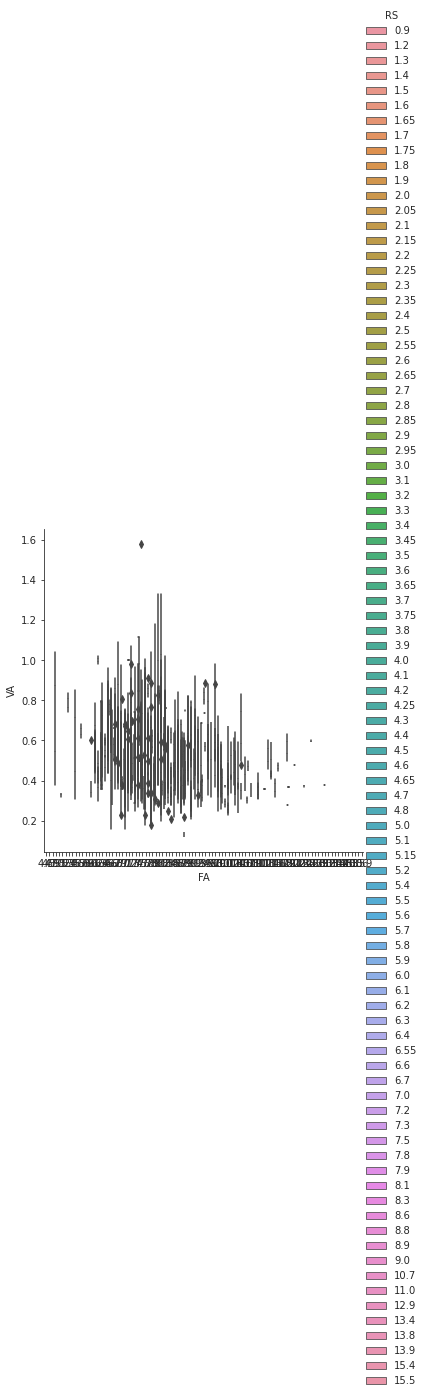

In [5]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("FA", "VA", "RS", data=df, kind="box")
    g.set_axis_labels("FA", "VA");

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


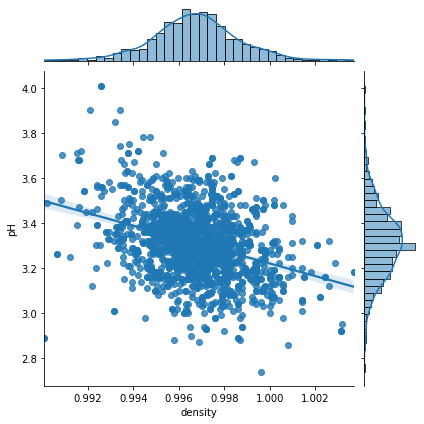

In [6]:
sns.jointplot("density", "pH", data=df, kind='reg');

<AxesSubplot:xlabel='VA', ylabel='quality'>

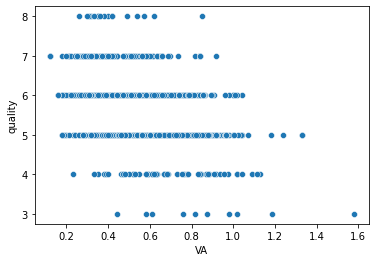

In [7]:
sns.scatterplot(x='VA',y='quality',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

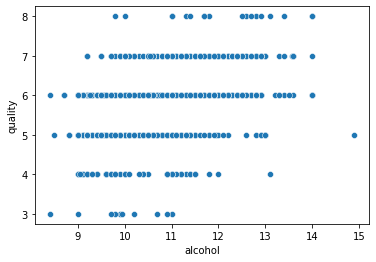

In [8]:
sns.scatterplot(x='alcohol',y='quality',data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

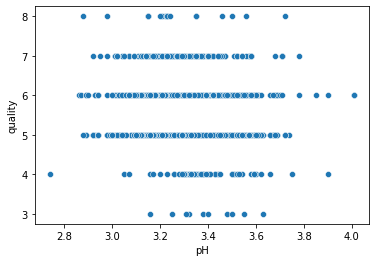

In [9]:
sns.scatterplot(x='pH',y='quality',data=df)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


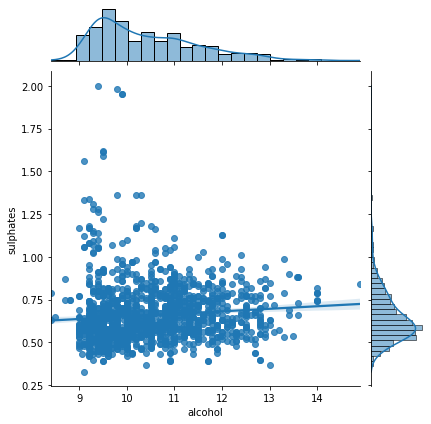

In [10]:
sns.jointplot("alcohol", "sulphates", data=df, kind='reg');

 ###  <span style='color:Purple'>Deleting the unwanted columns </span>

In [11]:
del df['FSD']

In [12]:
del df['TSD']

In [13]:
del df['density']

In [14]:
del df['chlorides']

In [15]:
del df ['CA']

In [16]:
del df ['RS']

In [17]:
del df ['FA']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VA         1599 non-null   float64
 1   pH         1599 non-null   float64
 2   sulphates  1599 non-null   float64
 3   alcohol    1599 non-null   float64
 4   quality    1599 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.6 KB


###  <span style='color:Purple'> Making the model</span>

In [19]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('quality',axis='columns'),df.quality)

LinearRegression()

In [20]:
reg.coef_

array([-1.15583465, -0.30579698,  0.63528037,  0.32120762])

In [21]:
reg.intercept_

3.492573494140646

### <span style='color:Purple'>Making the prediction </span>

In [22]:
reg.predict([[0.88,3.2,1.56,10]])

array([5.70000227])

In [23]:
reg.predict([[0.9,3.8,0.5,10.9]])

array([5.10909706])

In [24]:
reg.predict([[0.8,4.2,0.8,9.9]])

array([4.97173823])

In [25]:
reg.predict([[0.7,3.6,0.9,10.9]])

array([5.65553554])

###  <span style='color:Purple'> Converting the Model to Pickel Format</span>

In [26]:
import pickle

In [27]:
with open('WQP_pickle','wb') as file:
    pickle.dump(reg,file)

In [28]:
reg.coef_

array([-1.15583465, -0.30579698,  0.63528037,  0.32120762])

In [29]:
reg.intercept_

3.492573494140646